# **Project Name**    - Sales Prediction Using Python

# **Problem Statement**


Businesses, whether offering products or services, operate in an ever-evolving market landscape. To stay competitive, it is crucial to forecast sales trends accurately. This requires analyzing key influencing factors such as marketing spend, audience demographics, and the effectiveness of various advertising channels.

## Key Challenges
1. **Advertising Spend Effectiveness:** Quantifying the direct and indirect effects of varying advertising budgets on sales performance.  
2. **Audience Targeting:** Segmenting consumer groups and understanding how each segment contributes to sales.  
3. **Channel Selection:** Identifying the most effective advertising platforms to achieve maximum sales returns.  

## Project Goal
To build a machine learning-based predictive model using Python that estimates future sales. The model will analyze the impact of marketing expenditure, target audience characteristics, and advertising platforms to deliver strategic insights.

## Why It Matters
With reliable sales forecasts, businesses can fine-tune their marketing strategies, better allocate advertising budgets, and quickly adapt to market fluctuations, thereby enhancing decision-making and boosting profitability.

## Methodology
This project will apply supervised learning techniques, focusing on regression algorithms for predictive analysis. Data preprocessing, feature engineering, and model evaluation will form the foundation of the modeling pipeline using Python libraries such as Pandas, Scikit-learn, and Matplotlib for visualization.

## Expected Deliverables
A functional and interpretable machine learning model capable of accurately forecasting sales. The tool will also offer data-driven recommendations for optimizing advertising strategies based on spending levels, audience segments, and platform performance.


# Importing the Dependencies

In [ ]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Import evaluation metric libraries
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Import Model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Import tree for visualization
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG,display

import warnings
warnings.filterwarnings('ignore')

# Data Collection and processing

In [2]:
sales_dataset = pd.read_csv('https://raw.githubusercontent.com/utkarshranjan01/Sales-Prediction/refs/heads/main/Advertising.csv')

In [3]:
sales_dataset.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
sales_dataset.shape

(200, 5)

In [5]:
sales_dataset.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
sales_dataset.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
sales_dataset['Unnamed: 0'].value_counts()

,count
Unnamed: 0,
1,1
2,1
3,1
4,1
5,1
...,...
196,1
197,1
198,1


In [8]:
sales_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
sales_dataset.isnull().sum().sum()

np.int64(0)

In [10]:
# Dataset Duplicate Value Count
dup = sales_dataset.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


# What do we know till now about the dataset
- It's an Advertising dataset consists of Sales of TV, Radio and Newspaper.
- There are 200 rows and 5 columns provided in the data.
- No duplicate values exist in the dataset.
- Null values not exist in the dataset.

In [11]:
sales_dataset.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [12]:
df = sales_dataset.copy()

In [13]:
for i in sales_dataset.columns.tolist():
  print("No. of unique values in",i,"is",sales_dataset[i].nunique())

No. of unique values in Unnamed: 0 is 200
No. of unique values in TV is 190
No. of unique values in Radio is 167
No. of unique values in Newspaper is 172
No. of unique values in Sales is 121


# Data Wrangling

In [14]:
# We would remove the Unnamed column as its just containing the indexes of the rows
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [15]:
dependent_variable = ['Sales']

# Data Visualization and Representing Charts

In [16]:
df.columns.tolist()

['TV', 'Radio', 'Newspaper', 'Sales']

# Chart - 1 : Sales Vs Various Numerical Features

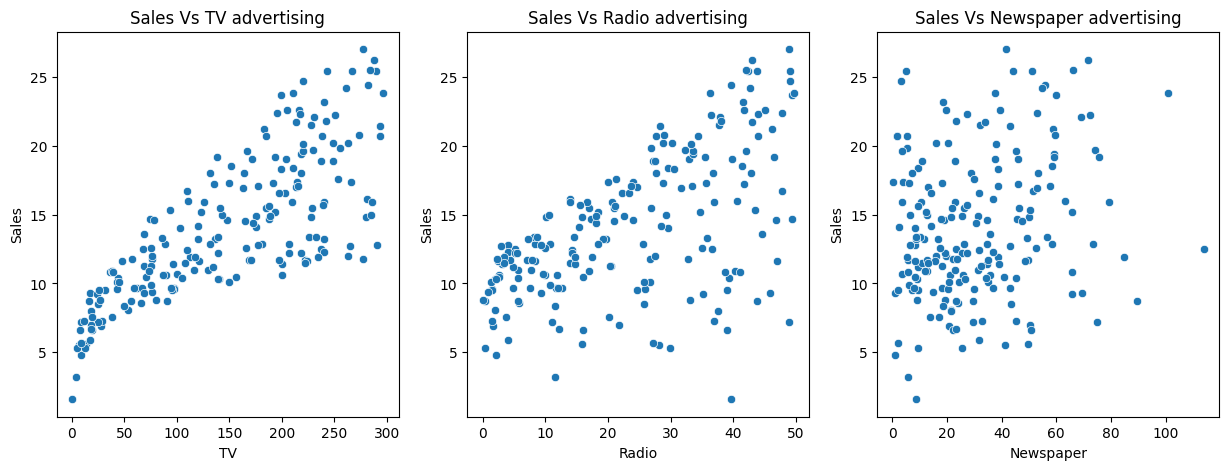

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))


sns.scatterplot(df,x='TV',y='Sales', ax = axes[0])
axes[0].set_title('Sales Vs TV advertising')

sns.scatterplot(df,x='Radio',y='Sales', ax = axes[1])
axes[1].set_title('Sales Vs Radio advertising')

sns.scatterplot(df,x='Newspaper',y='Sales', ax = axes[2])
axes[2].set_title('Sales Vs Newspaper advertising')

plt.show()

## What can we observe
- We can observe that increasing TV advertising has the most clear and direct effect on the sales followed by radio and at last the newspaper which seems to be quite unstable
- There are many outliers present in the Newspaper advertising vs the Sales

# Chart - 2 : Sales Vs Average of all the advertisements

In [20]:
# Dynamically get the list of columns to average

cols_to_avg = [col for col in df.columns if col not in ['Sales']]

averages = []
for cols,rows in df.iterrows():
  avg=0
  for col in cols_to_avg:
    avg+=rows[col]
  avg/=3
  averages.append(avg)

df['Average'] = averages

df.head()


,TV,Radio,Newspaper,Sales,Average
0,230.1,37.8,69.2,22.1,149.822222
1,44.5,39.3,45.1,10.4,57.288889
2,17.2,45.9,69.3,9.3,58.844444
3,151.5,41.3,58.5,18.5,111.688889
4,180.8,10.8,58.4,12.9,111.111111


<Axes: xlabel='Average', ylabel='Sales'>

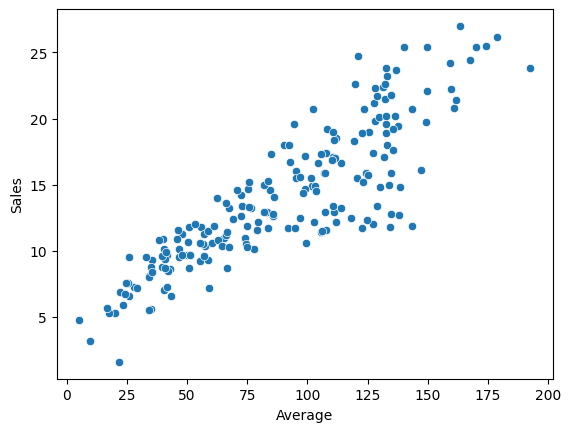

In [21]:
sns.scatterplot(df, x='Average', y = 'Sales')

This shows much more of a uniform distribution of Sales with respect to the avertisement spending with few outliers

# Chart - 3 : Correlation Heatmap

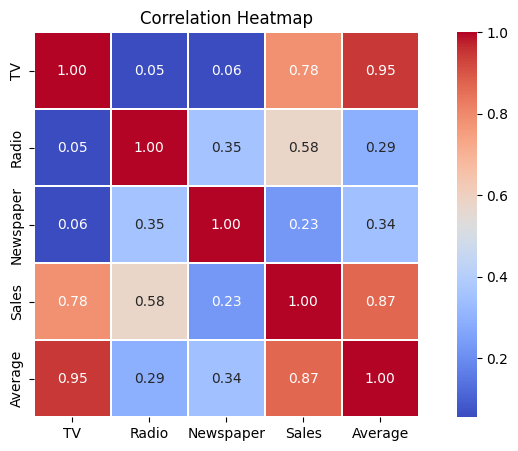

In [29]:
# Correlation Heatmap visualization the relation between the numerical features

plt.figure(figsize=(10, 5))

# Create a heatmap of the correlation matrix with annotations
sns.heatmap(df.corr(), annot=True, linewidths=0.2, fmt='.2f', square=True, cmap='coolwarm')

# Add a title to the plot
plt.title("Correlation Heatmap")

# Display the plot
plt.show()

From the above correlation heatmap we get to know that, TV Advertising expenses and Sales are highly correlated. Also the Average is very closely related to the sales column which makes sense as we saw in the plot earlier it was a proportional distribution.

# Chart - 4 : Pariplot of all the features of the dataset

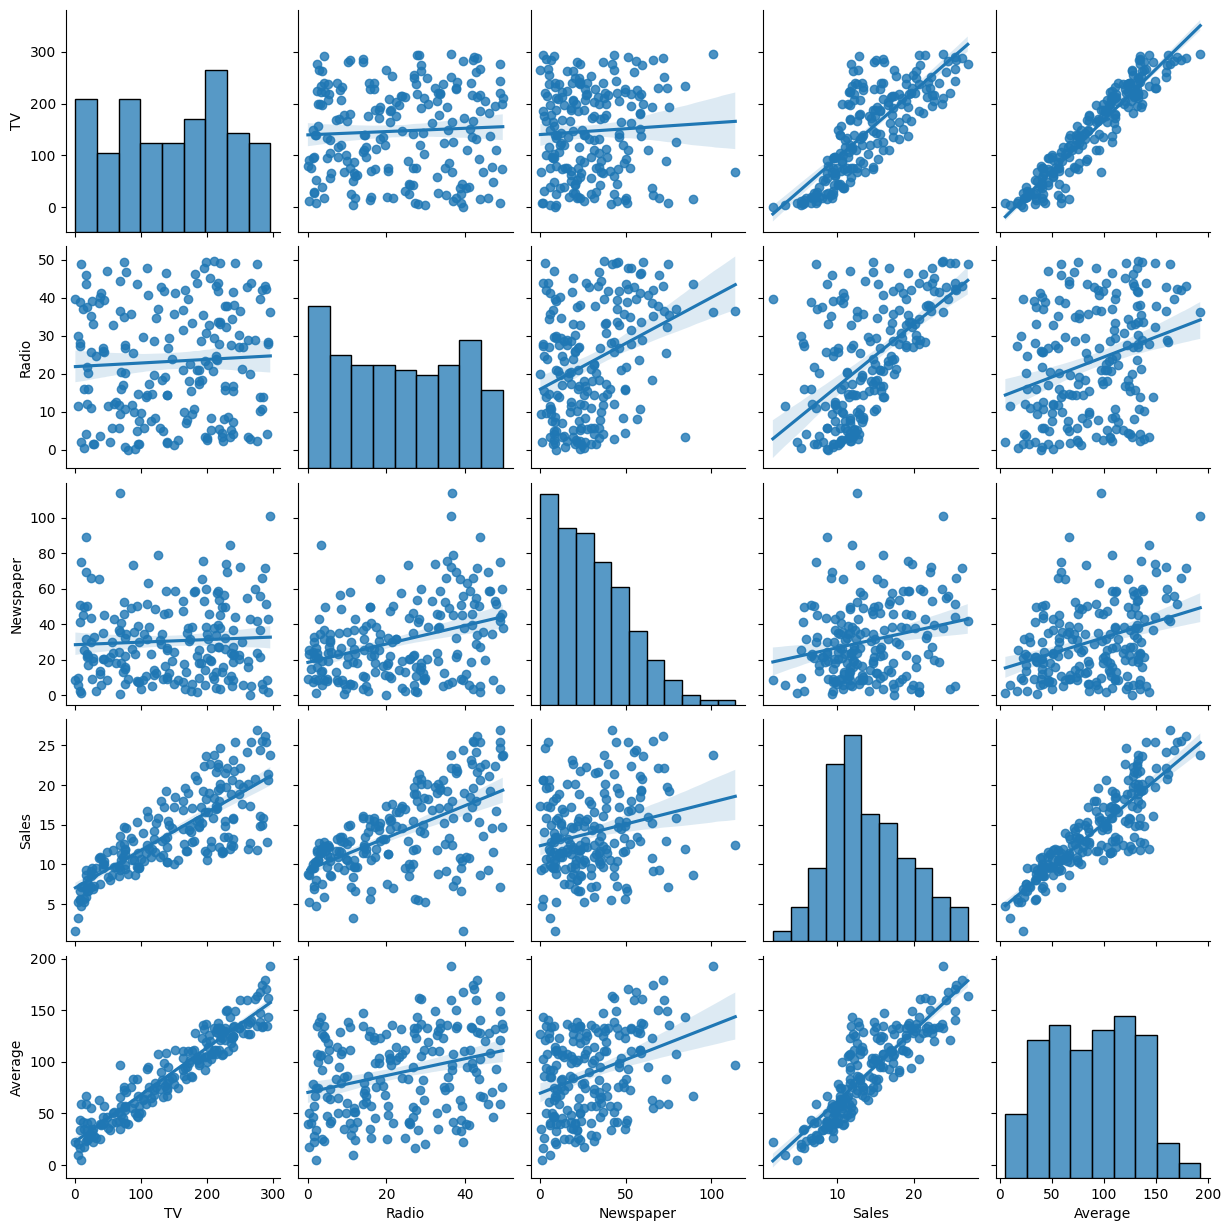

<Figure size 1000x1000 with 0 Axes>

In [33]:
sns.pairplot(df,kind="reg");
plt.figure(figsize=(10,10))

# Display the plot
plt.show()

# Data Preprocessing

## 1. Handling Outliers

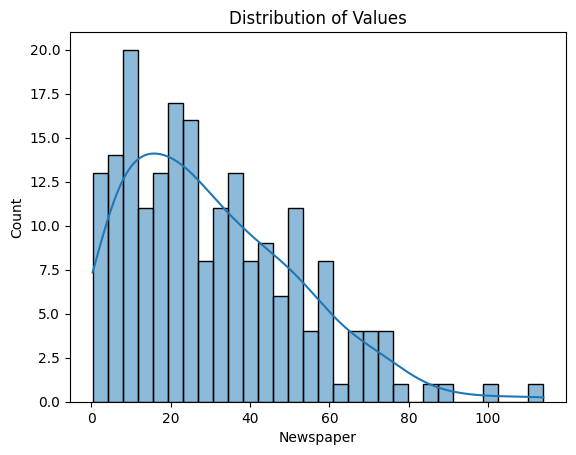

In [37]:
sns.histplot(df['Newspaper'], bins=30, kde=True)
plt.title('Distribution of Values')
plt.show()

In [38]:
# Removing the outlier from newspaper
df=df[df['Newspaper']<=90]

## 2. Selecting Features

In [40]:
# Selecting the features to avoid overfitting
features = [ i for i in df.columns.tolist() if i not in ['Sales', 'Average']]
features

['TV', 'Radio', 'Newspaper']

In [50]:
# Checking for multicollinearity by using VIF technique

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X):

  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return(vif)

In [52]:
continuous_variables = ['TV', 'Radio', 'Newspaper']
continuous_features_df = pd.DataFrame(df[continuous_variables])

In [53]:
continuous_features_df

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [55]:
calculate_vif(df[[i for i in continuous_features_df]])

,variables,VIF
0,TV,2.502183
1,Radio,3.275285
2,Newspaper,3.126386


As we can see the vif is not that high so we do not need to remove the columns from the dataset

# 3. Data Transformation

Let us check if the data is uniformally distributed

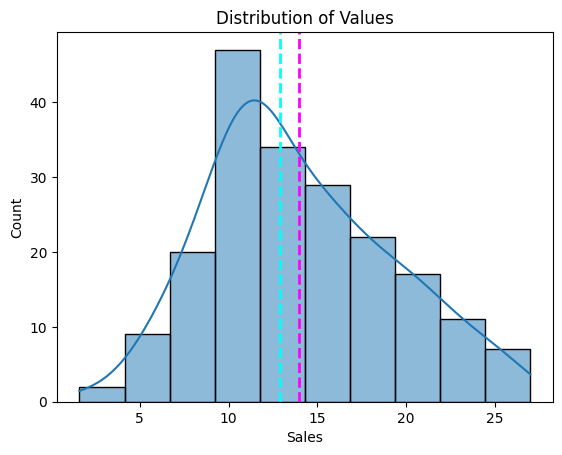

In [68]:
sns.histplot(df['Sales'], bins=10, kde=True)
plt.title('Distribution of Values')

plt.axvline(df[dependent_variable[0]].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df[dependent_variable[0]].median(), color='cyan', linestyle='dashed', linewidth=2)

plt.show()

In [69]:
df[dependent_variable].skew()

,0
Sales,0.40713


As we can see the data is normally distributed and we don't need to alter it in any way as the data is not skewed

# 4. Data Scaling

In [70]:
features

['TV', 'Radio', 'Newspaper']

In [73]:
# Scaling the dataset

scaler = StandardScaler()
X = scaler.fit_transform(df[features])
y = df[dependent_variable]

We just used standard scaling to scale the data before training the model

# 5. Data Splitting

In [74]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<Axes: ylabel='Count'>

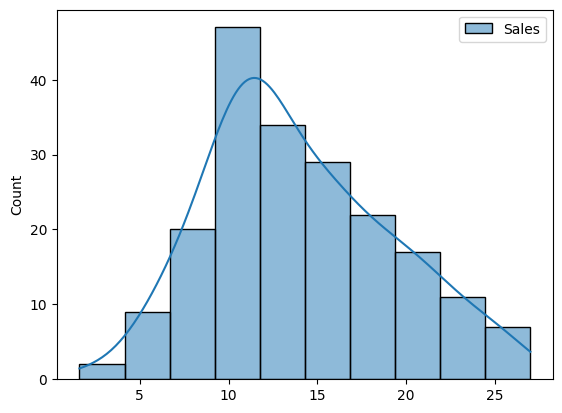

In [78]:
# Checking the train distribution of dependent variable
y_train.nunique()
sns.histplot(y, bins=10, kde=True)

# 6. Implementing the ML Models

In [86]:
def evaluate_model(model, y_test, y_pred):

  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test, y_pred)
  y_train_pred = model.predict(X_train)
  r2_train = r2_score(y_train, y_train_pred)
  r2 = r2_score(y_test, y_pred)
  r2_adjusted = 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))

  # Printing the different scores
  print(f'MSE: {mse}')
  print(f'RMSE: {rmse}')
  print(f'MAE: {mae}')
  print(f'Train R2: {r2}')
  print(f'Test R2: {r2}')
  print(f'Adjusted R2: {r2}')

  # plotting the actual and predicted values
  plt.figure(figsize=(12,4))
  plt.plot((y_pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.xlabel('Numbe of Test Data')
  plt.ylabel('Sales')
  plt.title('Actual and Predicted Sales', fontsize=12)


  model_score = [mse,rmse,mae,r2_train,r2,r2_adjusted]
  return model_score

In [87]:
# Creating a score dataframe
score = pd.DataFrame(index = ['MSE', 'RMSE', 'MAE', 'Train R2', 'Test R2', 'Adjusted R2'])

# 1. Linear Regression

In [88]:
reg = LinearRegression()
reg.fit(X_train, y_train)

# Prediction on the model
y_pred_li = reg.predict(X_test)

MSE: 2.4320766824695403
RMSE: 1.5595116807736775
MAE: 1.177152628314206
Train R2: 0.9098946359000558
Test R2: 0.9098946359000558
Adjusted R2: 0.9098946359000558


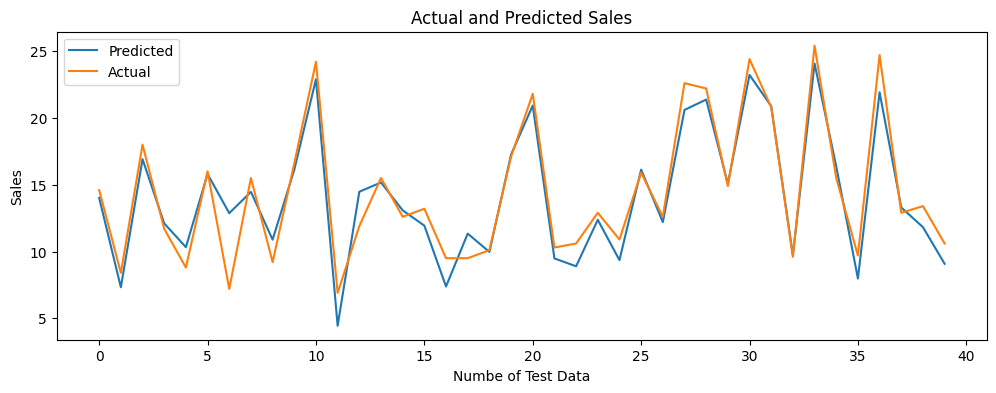

In [89]:
# Visualizing evaluation Metric Score chart
linear_score = evaluate_model(reg, y_test,y_pred_li)
score['Linear regression'] = linear_score

In [90]:
score

,Linear regression
MSE,2.432077
RMSE,1.559512
MAE,1.177153
Train R2,0.889832
Test R2,0.909895
Adjusted R2,0.902386


## Hyperparameter Tuning and Cross Validation

In [92]:
# Define the model
reg = LinearRegression()

# Define the parameters we want to optimize there is only one here as not much changes we can make to the basic linear regression using defaults for most things
param_grid = {'fit_intercept': [True, False]}

# Perform grid search
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             return_train_score=True, scoring='r2')

In [93]:
# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)

Best parameters:  {'fit_intercept': True}
Best R2 score:  0.8794637215026521


In [94]:
# Now we will use the best parameter to train the model

best_reg = grid_search.best_estimator_
best_reg.fit(X_train, y_train)

LinearRegression()

In [96]:
# Predict on the test data
y_pred_li2 = best_reg.predict(X_test)

MSE: 2.4320766824695403
RMSE: 1.5595116807736775
MAE: 1.177152628314206
Train R2: 0.9098946359000558
Test R2: 0.9098946359000558
Adjusted R2: 0.9098946359000558


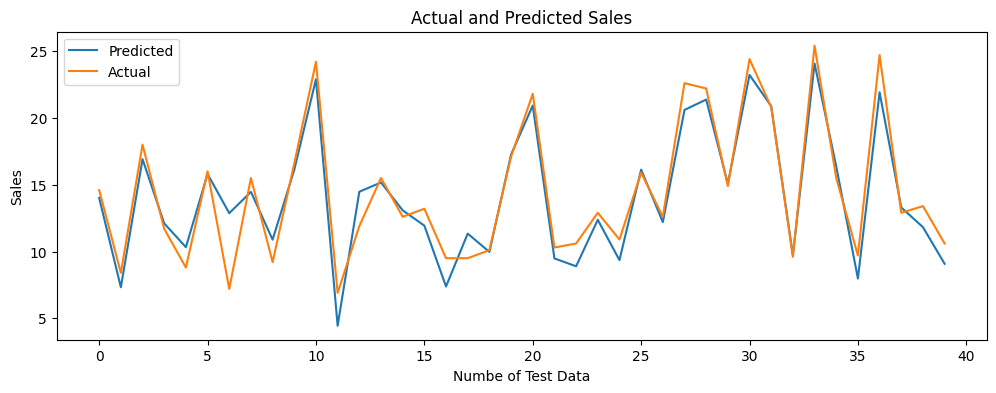

In [99]:
# Visualizing evaluation Metric Score chart
linear_score2 = evaluate_model(best_reg, y_test,y_pred_li2)
score['Linear regression tuned'] = linear_score2

In [100]:
score

,Linear regression,Linear regression tuned
MSE,2.432077,2.432077
RMSE,1.559512,1.559512
MAE,1.177153,1.177153
Train R2,0.889832,0.889832
Test R2,0.909895,0.909895
Adjusted R2,0.902386,0.902386


Here we used GridSearchCV for the hyperparameter tuning which is quick a standard and used in a lot of ML projects to tune the models.

There is no significant change in the R2 scores of the models which is understood as most estimators used were the defaults.

# 2. Lasso Regression

In [101]:
lasso = Lasso()

# Fit the lasso regression model to the training data
lasso.fit(X_train, y_train)

# Predict on the model
y_pred_lasso1 = lasso.predict(X_test)

MSE: 4.412196366645484
RMSE: 2.1005228793434942
MAE: 1.500579778178449
Train R2: 0.8365337067853652
Test R2: 0.8365337067853652
Adjusted R2: 0.8365337067853652


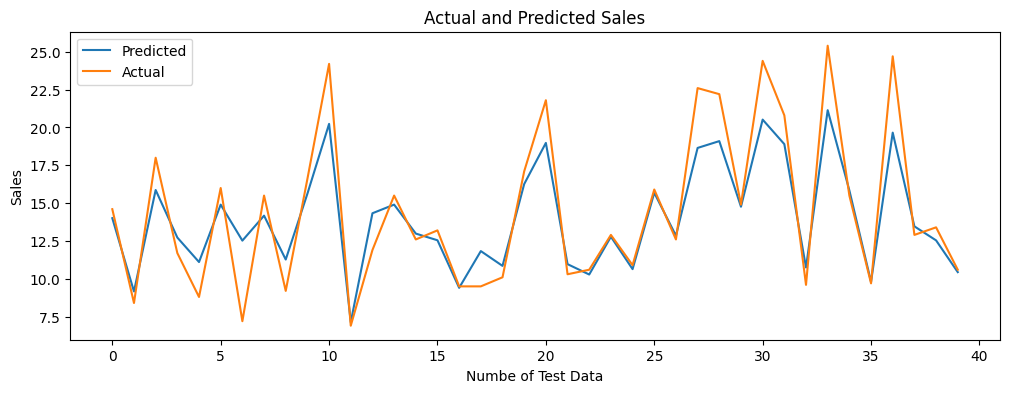

In [102]:
# Visualizing evaluation Metric Score chart
lasso_score = evaluate_model(lasso, y_test,y_pred_lasso1)
score['Lasso regression'] = lasso_score

In [103]:
score

,Linear regression,Linear regression tuned,Lasso regression
MSE,2.432077,2.432077,4.412196
RMSE,1.559512,1.559512,2.100523
MAE,1.177153,1.177153,1.500580
Train R2,0.889832,0.889832,0.818219
Test R2,0.909895,0.909895,0.836534
Adjusted R2,0.902386,0.902386,0.822912


The performance of the model is less than the Linear Regression so we will try to hyperparameter tune it.

## Hyperparameter Tuning and Cross Validation

In [104]:
lasso = Lasso()

# Define the parameters to be optimized & Perform grid search
parameters = {'alpha': [1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

# Fitting model
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-10, 1e-08, 1e-05, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20, 30, 40, 45, 50, 55, 60]},
             scoring='neg_mean_squared_error')

In [106]:
print("The optimum alpha value is found out to be :" ,lasso_regressor.best_params_)
print("We are using ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The optimum alpha value is found out to be : {'alpha': 0.01}
We are using  {'alpha': 0.01}  the negative mean squared error is:  -3.2038025925545


In [107]:
# Import the Lasso Regression class with best alpha
lasso = Lasso(alpha = lasso_regressor.best_params_['alpha'])

# Fit the lasso regression model to your training data
lasso.fit(X_train, y_train)

# Predict the model
y_pred_lassocv = lasso.predict(X_test)

MSE: 2.4238565146909337
RMSE: 1.5568739559421416
MAE: 1.1755801408509008
Train R2: 0.9101991827163601
Test R2: 0.9101991827163601
Adjusted R2: 0.9101991827163601


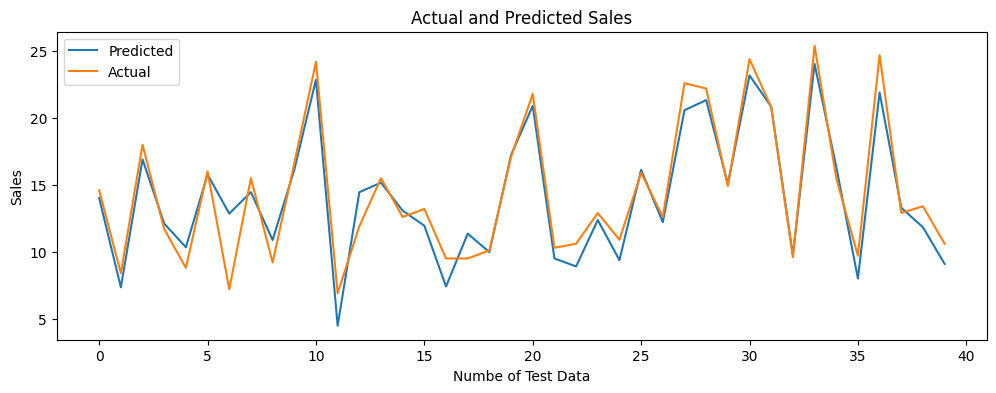

In [108]:
#Evaluation matrices for Lasso regression
lasso2 = evaluate_model(lasso, y_test,y_pred_lassocv)

name = 'Lasso with alpha = ' + str(lasso_regressor.best_params_['alpha'])
score[name] = lasso2

In [109]:
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01
MSE,2.432077,2.432077,4.412196,2.423857
RMSE,1.559512,1.559512,2.100523,1.556874
MAE,1.177153,1.177153,1.500580,1.175580
Train R2,0.889832,0.889832,0.818219,0.889823
Test R2,0.909895,0.909895,0.836534,0.910199
Adjusted R2,0.902386,0.902386,0.822912,0.902716


After tuning we have seen that there is increase in train and test set performance, which is upto 88% for train set and 91% for test set.

# 3. Ridge Regression

In [110]:
ridge = Ridge()

# Fit the ridge regression model to your training data
ridge.fit(X_train, y_train)

# Predict on the model
y_pred_ridge1 = ridge.predict(X_test)

MSE: 2.44804782650871
RMSE: 1.5646238610313694
MAE: 1.180541993916469
Train R2: 0.9093029252195848
Test R2: 0.9093029252195848
Adjusted R2: 0.9093029252195848


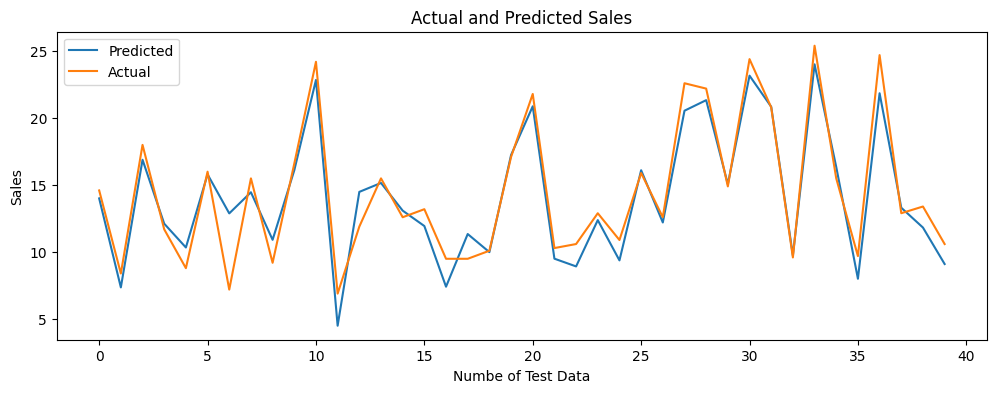

In [111]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(ridge, y_test,y_pred_ridge1)
score['Ridge'] = result

In [112]:
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge
MSE,2.432077,2.432077,4.412196,2.423857,2.448048
RMSE,1.559512,1.559512,2.100523,1.556874,1.564624
MAE,1.177153,1.177153,1.500580,1.175580,1.180542
Train R2,0.889832,0.889832,0.818219,0.889823,0.889800
Test R2,0.909895,0.909895,0.836534,0.910199,0.909303
Adjusted R2,0.902386,0.902386,0.822912,0.902716,0.901745


We have used Ridge regression technique to check the performance of the model and we have found that there is no majorly difference in between linear regression and Ridge. Both models are very similar.

## Hyperparameter Tuning and Cross Validation

In [114]:
ridge = Ridge()

# Define the parameters to be optimized & Perform grid search
parameters = {'alpha': [1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

# Fitting model
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-10, 1e-08, 1e-05, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20, 30, 40, 45, 50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [116]:
# Getting optimum parameters
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("We will be using ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}
We will be using  {'alpha': 1}  the negative mean squared error is:  -3.2105087592751773


In [117]:
# Start with best alpha
ridge = Ridge(alpha = ridge_regressor.best_params_['alpha'])

# Fit the ridge regression model to your training data
ridge.fit(X_train, y_train)

# Predict on model
y_pred_ridge = ridge.predict(X_test)

MSE: 2.44804782650871
RMSE: 1.5646238610313694
MAE: 1.180541993916469
Train R2: 0.9093029252195848
Test R2: 0.9093029252195848
Adjusted R2: 0.9093029252195848


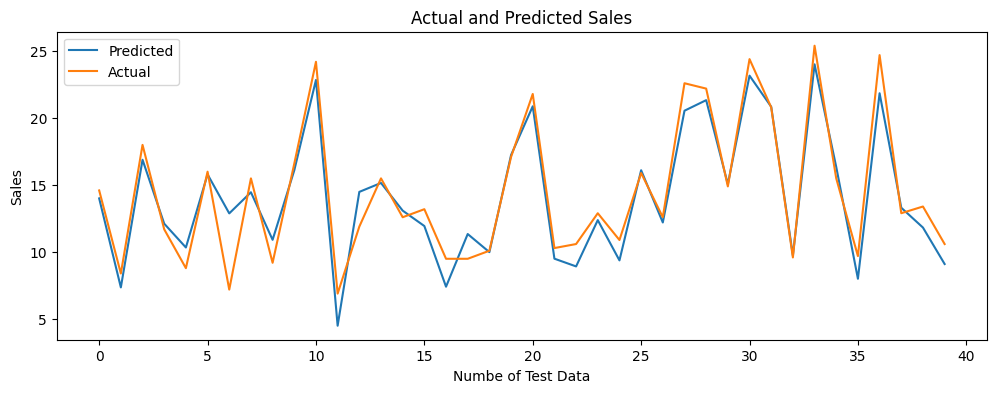

In [118]:
# Evaluation matrices for Ridge regression
result = evaluate_model(ridge, y_test,y_pred_ridge)

namer = 'Ridge with alpha = ' + str(ridge_regressor.best_params_['alpha'])

score[namer] = result

In [119]:
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 1
MSE,2.432077,2.432077,4.412196,2.423857,2.448048,2.448048
RMSE,1.559512,1.559512,2.100523,1.556874,1.564624,1.564624
MAE,1.177153,1.177153,1.500580,1.175580,1.180542,1.180542
Train R2,0.889832,0.889832,0.818219,0.889823,0.889800,0.889800
Test R2,0.909895,0.909895,0.836534,0.910199,0.909303,0.909303
Adjusted R2,0.902386,0.902386,0.822912,0.902716,0.901745,0.901745


We have tuned Ridge regression using hyperparametric technique & check the performance of the model and i have found that the tuned and untuned Ridge regression model both are given the same accuracy for the train and test set.

# 4. Decision Tree

In [ ]:
dt = DecisionTreeRegressor(random_state=1)

# Fit the Decision Tree model to your training data
dt.fit(X_train,y_train)

# Predict on the model
y_pred_dt1 = dt.predict(X_test)

MSE: 1.3222499999999997
RMSE: 1.1498912992104948
MAE: 0.9125
Train R2: 0.9510123103683663
Test R2: 0.9510123103683663
Adjusted R2: 0.9510123103683663


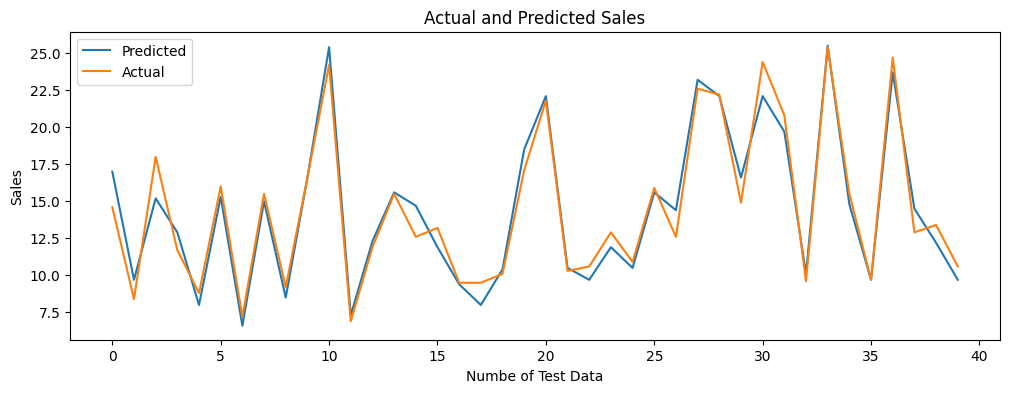

In [121]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(dt, y_test,y_pred_dt1)
score['Decision tree'] = result

In [122]:
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 1,Decision tree
MSE,2.432077,2.432077,4.412196,2.423857,2.448048,2.448048,1.322250
RMSE,1.559512,1.559512,2.100523,1.556874,1.564624,1.564624,1.149891
MAE,1.177153,1.177153,1.500580,1.175580,1.180542,1.180542,0.912500
Train R2,0.889832,0.889832,0.818219,0.889823,0.889800,0.889800,1.000000
Test R2,0.909895,0.909895,0.836534,0.910199,0.909303,0.909303,0.951012
Adjusted R2,0.902386,0.902386,0.822912,0.902716,0.901745,0.901745,0.946930


From the decision tree algorithm we got train R2 score is 1 and test R2 score is 95% which shows the overfitting condition on train set.

## Hyperparameter Tuning and Cross Validation

In [123]:
dt_model = DecisionTreeRegressor(random_state=1)

# Hyperparameter Grid
grid = {'max_depth' : [8,10,12,14,16],
        'min_samples_split' : np.arange(35,50),
        'min_samples_leaf' : np.arange(22,31,2)}

# Fitting model with hypertuned paramaters using grid search
dt_gridsearch = GridSearchCV(dt_model,
                             grid,
                             cv=6,
                             scoring= 'neg_root_mean_squared_error')
dt_gridsearch.fit(X_train,y_train)
dt_best_params = dt_gridsearch.best_params_

In [125]:
# Building Decision Tree model with best parameters
dt_model = DecisionTreeRegressor(max_depth=dt_best_params['max_depth'],
                                 min_samples_leaf=dt_best_params['min_samples_leaf'],
                                 min_samples_split=dt_best_params['min_samples_split'],
                                 random_state=1)

# Fitting model
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=np.int64(22),
                      min_samples_split=np.int64(35), random_state=1)

In [126]:
# Predict on the model
y_pred_dt = dt_model.predict(X_test)

MSE: 4.853930208143661
RMSE: 2.2031636816504716
MAE: 1.7902569055944055
Train R2: 0.8201680268253714
Test R2: 0.8201680268253714
Adjusted R2: 0.8201680268253714


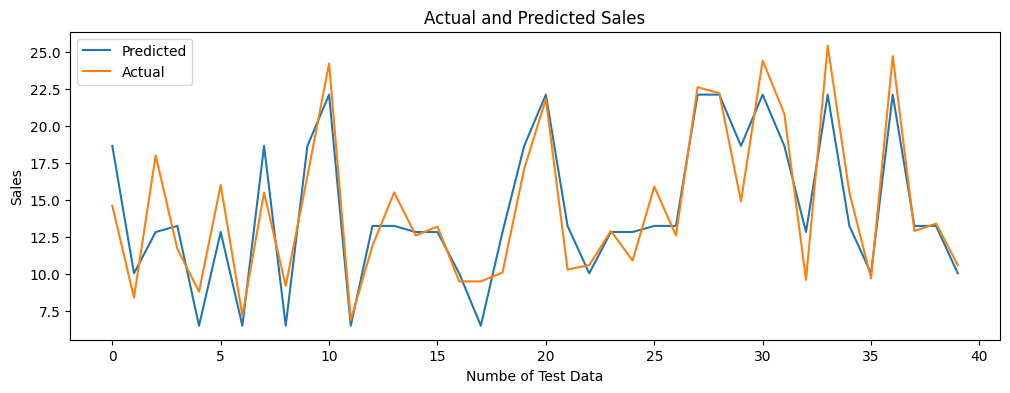

In [127]:
# Evaluation matrices for DecisionTree
result = evaluate_model(dt_model, y_test,y_pred_dt)
score['Decision tree tuned'] = result

In [128]:
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 1,Decision tree,Decision tree tuned
MSE,2.432077,2.432077,4.412196,2.423857,2.448048,2.448048,1.322250,4.853930
RMSE,1.559512,1.559512,2.100523,1.556874,1.564624,1.564624,1.149891,2.203164
MAE,1.177153,1.177153,1.500580,1.175580,1.180542,1.180542,0.912500,1.790257
Train R2,0.889832,0.889832,0.818219,0.889823,0.889800,0.889800,1.000000,0.870597
Test R2,0.909895,0.909895,0.836534,0.910199,0.909303,0.909303,0.951012,0.820168
Adjusted R2,0.902386,0.902386,0.822912,0.902716,0.901745,0.901745,0.946930,0.805182


From the above tuned Decision tree regression, it has seen that earlier we have faced overfitting condition. After tuning it there is no such condition and it looks like model performs with good accuracy around 87% on train and 82% on test data.

# 5. Gradient Boost Regressor

In [130]:
gb = GradientBoostingRegressor(random_state=0)

# Fit the Gradient Boosting model to the training data
gb.fit(X_train,y_train)

# Predict on the model
y_pred_gb1 = gb.predict(X_test)

MSE: 0.49401210897574116
RMSE: 0.7028599497593679
MAE: 0.5412333923464919
Train R2: 0.9816974763707526
Test R2: 0.9816974763707526
Adjusted R2: 0.9816974763707526


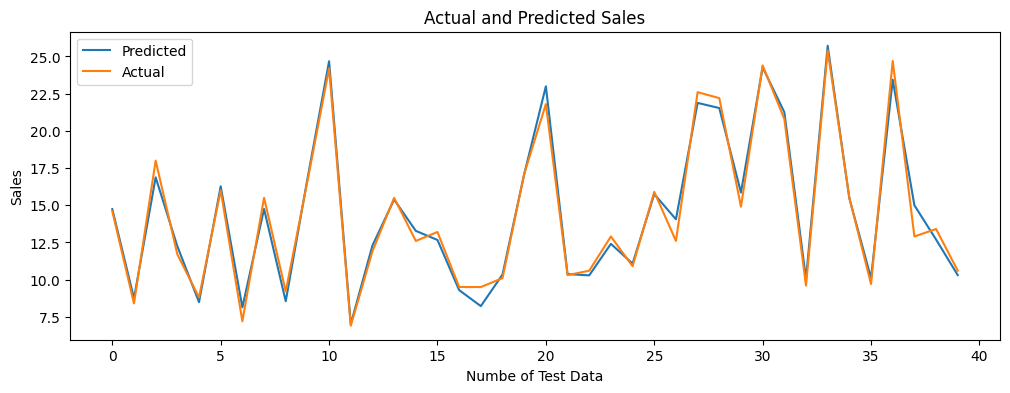

In [131]:
result = evaluate_model(gb, y_test,y_pred_gb1)
score['Gradient Boosting Regressor'] = result

In [132]:
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 1,Decision tree,Decision tree tuned,Gradient Boosting Regressor
MSE,2.432077,2.432077,4.412196,2.423857,2.448048,2.448048,1.322250,4.853930,0.494012
RMSE,1.559512,1.559512,2.100523,1.556874,1.564624,1.564624,1.149891,2.203164,0.702860
MAE,1.177153,1.177153,1.500580,1.175580,1.180542,1.180542,0.912500,1.790257,0.541233
Train R2,0.889832,0.889832,0.818219,0.889823,0.889800,0.889800,1.000000,0.870597,0.998732
Test R2,0.909895,0.909895,0.836534,0.910199,0.909303,0.909303,0.951012,0.820168,0.981697
Adjusted R2,0.902386,0.902386,0.822912,0.902716,0.901745,0.901745,0.946930,0.805182,0.980172


Using Gradient Boosting Regressor i have got accuracy around 99% and 98% on train and test data respectively. Looking like, somehow overfitted also.

## Hyperparameter Tuning and Cross Validation

In [134]:
gb_model = GradientBoostingRegressor(random_state=0)
gb_params = {'n_estimators':[300],
             'min_samples_leaf':np.arange(20,24),
             'max_depth':np.arange(14,17)
             }

In [135]:
random_search = RandomizedSearchCV(gb_model, param_distributions=gb_params, cv=6, n_iter=20, scoring='neg_root_mean_squared_error', n_jobs=-1)
random_search.fit(X_train, y_train)

gb_best_params = random_search.best_params_

In [136]:
gb_model = GradientBoostingRegressor(n_estimators=gb_best_params['n_estimators'],
                                     min_samples_leaf=gb_best_params['min_samples_leaf'],
                                     max_depth = gb_best_params['max_depth'],
                                     random_state=0)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=np.int64(14), min_samples_leaf=np.int64(20),
                          n_estimators=300, random_state=0)

In [137]:
# Predict on the Model
y_pred_gb = gb_model.predict(X_test)# Predict on the Model

MSE: 1.3201533198412574
RMSE: 1.148979251266644
MAE: 0.7837158154098387
Train R2: 0.9510899897155951
Test R2: 0.9510899897155951
Adjusted R2: 0.9510899897155951


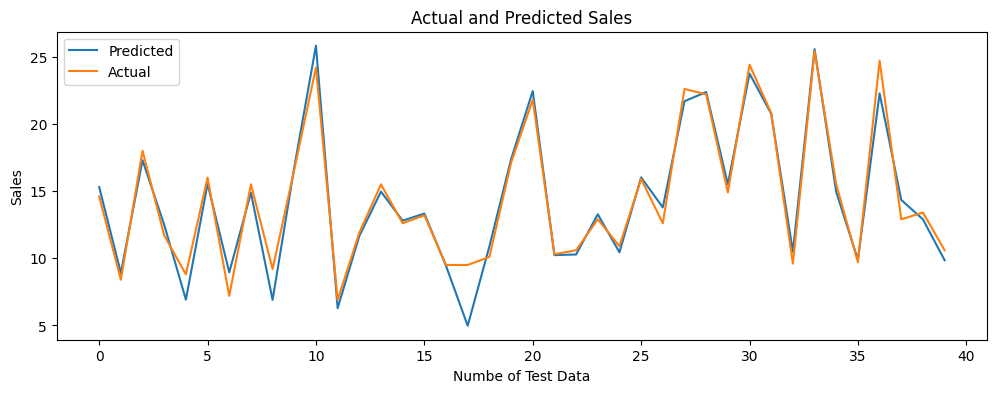

In [138]:
# Evaluation matrices for GradientBoosting
result = evaluate_model(gb_model, y_test,y_pred_gb)
score['Gradient Boosting Regressor Tuned'] = result

Randomized search cross-validation (CV) is used to efficiently explore the hyperparameter space of a machine learning model. It works by randomly sampling from the search space of hyperparameters, rather than exhaustively trying every possible combination. This allows for a more efficient search while still providing a good chance of finding good hyperparameter values. Additionally, by using cross-validation to evaluate the performance of each set of hyperparameters, one can ensure that the model is not overfitting to the training data.

In [139]:
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 1,Decision tree,Decision tree tuned,Gradient Boosting Regressor,Gradient Boosting Regressor Tuned
MSE,2.432077,2.432077,4.412196,2.423857,2.448048,2.448048,1.322250,4.853930,0.494012,1.320153
RMSE,1.559512,1.559512,2.100523,1.556874,1.564624,1.564624,1.149891,2.203164,0.702860,1.148979
MAE,1.177153,1.177153,1.500580,1.175580,1.180542,1.180542,0.912500,1.790257,0.541233,0.783716
Train R2,0.889832,0.889832,0.818219,0.889823,0.889800,0.889800,1.000000,0.870597,0.998732,0.995759
Test R2,0.909895,0.909895,0.836534,0.910199,0.909303,0.909303,0.951012,0.820168,0.981697,0.951090
Adjusted R2,0.902386,0.902386,0.822912,0.902716,0.901745,0.901745,0.946930,0.805182,0.980172,0.947014


After using the Randomised search CV, it gave accuracy 99% on train data & 95% on test data which is comparatively less than the untuned model meaning the default parameters used adapt better.

# Plotting the R2 scores for different models (Closer to 1 the better)

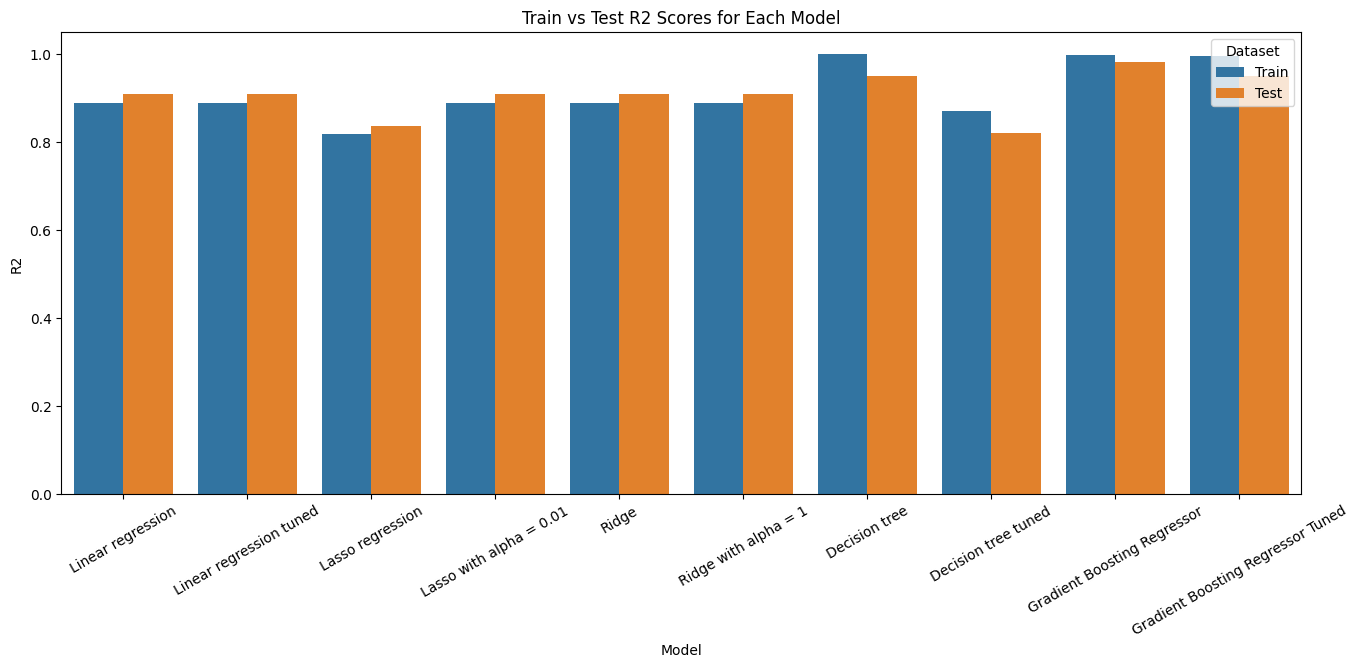

In [151]:
models = list(score.columns)
train = score.iloc[-3,:].reset_index()
test = score.iloc[-2,:].reset_index()

train.columns = ['Model', 'R2']
test.columns = ['Model', 'R2']
train['Dataset'] = 'Train'
test['Dataset'] = 'Test'

# Combine into one long-form DataFrame
df_long = pd.concat([train, test], axis=0)

plt.figure(figsize=(16, 6))
sns.barplot(data=df_long, x='Model', y='R2', hue='Dataset')

plt.xticks(rotation=30)
plt.title('Train vs Test R2 Scores for Each Model')
plt.show()

In [153]:
score_tr = score.transpose()
score_tr

,MSE,RMSE,MAE,Train R2,Test R2,Adjusted R2
Linear regression,2.432077,1.559512,1.177153,0.889832,0.909895,0.902386
Linear regression tuned,2.432077,1.559512,1.177153,0.889832,0.909895,0.902386
Lasso regression,4.412196,2.100523,1.500580,0.818219,0.836534,0.822912
Lasso with alpha = 0.01,2.423857,1.556874,1.175580,0.889823,0.910199,0.902716
Ridge,2.448048,1.564624,1.180542,0.889800,0.909303,0.901745
Ridge with alpha = 1,2.448048,1.564624,1.180542,0.889800,0.909303,0.901745
Decision tree,1.322250,1.149891,0.912500,1.000000,0.951012,0.946930
Decision tree tuned,4.853930,2.203164,1.790257,0.870597,0.820168,0.805182
Gradient Boosting Regressor,0.494012,0.702860,0.541233,0.998732,0.981697,0.980172
Gradient Boosting Regressor Tuned,1.320153,1.148979,0.783716,0.995759,0.951090,0.947014


In [166]:
metric = 'Test R2'

sorted_df = score_tr.sort_values(by=metric, ascending=False)
sorted_df

,MSE,RMSE,MAE,Train R2,Test R2,Adjusted R2
Gradient Boosting Regressor,0.494012,0.702860,0.541233,0.998732,0.981697,0.980172
Gradient Boosting Regressor Tuned,1.320153,1.148979,0.783716,0.995759,0.951090,0.947014
Decision tree,1.322250,1.149891,0.912500,1.000000,0.951012,0.946930
Lasso with alpha = 0.01,2.423857,1.556874,1.175580,0.889823,0.910199,0.902716
Linear regression tuned,2.432077,1.559512,1.177153,0.889832,0.909895,0.902386
Linear regression,2.432077,1.559512,1.177153,0.889832,0.909895,0.902386
Ridge,2.448048,1.564624,1.180542,0.889800,0.909303,0.901745
Ridge with alpha = 1,2.448048,1.564624,1.180542,0.889800,0.909303,0.901745
Lasso regression,4.412196,2.100523,1.500580,0.818219,0.836534,0.822912
Decision tree tuned,4.853930,2.203164,1.790257,0.870597,0.820168,0.805182


In [169]:
metric = 'Test R2'

max_row = score_tr[score_tr[metric] == score_tr[metric].max()]
max_row

,MSE,RMSE,MAE,Train R2,Test R2,Adjusted R2
Gradient Boosting Regressor,0.494012,0.70286,0.541233,0.998732,0.981697,0.980172


# Best Model

After running several models like linear, lasso, ridge regressors, decision trees and gradient boosting regressors we have found our best model. We can see that the Gradient Boosting Regressor is the best model with Test R2 as 0.98 and train R2 being 0.99 both are close enought and we get a really close result so this is by far our best model.

# Conclusion

In today’s rapidly evolving market, anticipating sales performance is essential for the success of both product and service-based businesses. During the Data Science internship at **Oasis Infobyte**, this project focused on developing a machine learning model in Python to accurately predict future sales outcomes.

### Key Insights:

- A clear **positive relationship** was observed between advertising investments (particularly in **TV** and **Radio**) and sales performance, with **TV advertisements showing the strongest impact** on boosting sales.
- The **R² score** was used as the main performance metric, indicating the model's ability to explain variance in the sales data.
- Among the models evaluated, the **Gradient Boosting Regressor** delivered the highest performance, achieving:
  - **99% accuracy on training data**
  - **98% accuracy on test data**

### Main Learnings:

- Recognizing how **advertising budgets affect sales** enables better allocation of resources.
- The final model selected proves to be highly effective for **predictive sales analysis**.
- The **R² score** serves as a dependable measure of how well the model fits and predicts sales data.

This project not only explored the technical side of sales prediction but also emphasized the strategic benefits of applying data science in business planning. The results provide meaningful direction for **future marketing and sales campaigns**, making data-driven decision-making more accessible and effective.